In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import random, seed
seed(1)

In [2]:
#Create a function that given the size of the group, the bias, the rivalry, 
# the baseline fecundity, and the scale of cooperaitve benefits, returns the 
# optimal proportion of helpers
def optimal_p(A, D, H, B, N):
    
    #Coefficients of the quadratic polynomial
    alpha=-(N**3)*(A-1)*D*(B*D*(A-1)+H)
    beta=-2*(N**2)*(1-D+D*N)*(B*D*(A-1)+H)
    gamma=-N*(1-D+D*N)*(B*(1-D+D*N)-H*N)
    #Evaluate the quadratic equation
    if alpha==0:
        if beta==0:
            if gamma<0:
                p=0
            else:
                p=1
        else:
            p=np.min([np.max([-gamma/beta,0]),1])
    else:
        if beta**2-4*alpha*gamma>=0:
            p=np.max([0,np.min([1,(-beta-np.sqrt(beta**2-4*gamma*alpha))/(2*alpha)])])
        else:
            p=0
            
    #Return optimal proportion of helpers
    return p

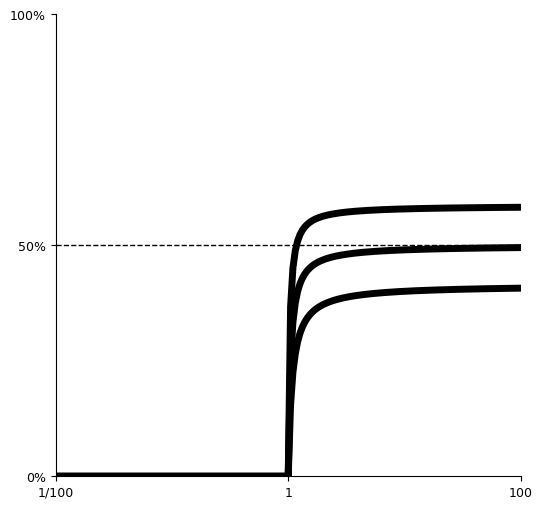

In [22]:
#Generate and save Figure 3B
fig, ax = plt.subplots(figsize=(6, 6))

#Parameter values
As=[0.5, 1, 2] #Different bias lines
D=1
B=1
N=100

grid=100
space=[i+1 for i in range(grid)]
HBs=[1/space[-(i+1)] for i in range(grid)]+space[1:]
xs=[i for i in range(len(HBs))]
ps=np.zeros((len(As), len(HBs)))
mid=0.5*np.ones(len(HBs))

#Loop over different biases
for j in range(len(As)):
    A=As[j]
    for i in range(len(HBs)):
        H=HBs[i]
        ps[j,i]=optimal_p(A, D, H, B, N)
    ax.plot(xs, ps[j,:], c='k', linewidth=5)


#Plot cosmetics
ax.plot(xs, mid, c='k', linestyle='--', linewidth=1)
plt.ylim([0, 1])
plt.yticks([0, 0.5, 1])
ax.set_yticklabels(['0%', '50%', '100%'])


plt.xlim([xs[0], xs[-1]])
plt.xticks([xs[0], int(len(xs)/2), xs[-1]])
ax.set_xticklabels(['1/100', '1', '100'])

plt.rcParams.update({'font.size': 18})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('Figure3B.pdf')

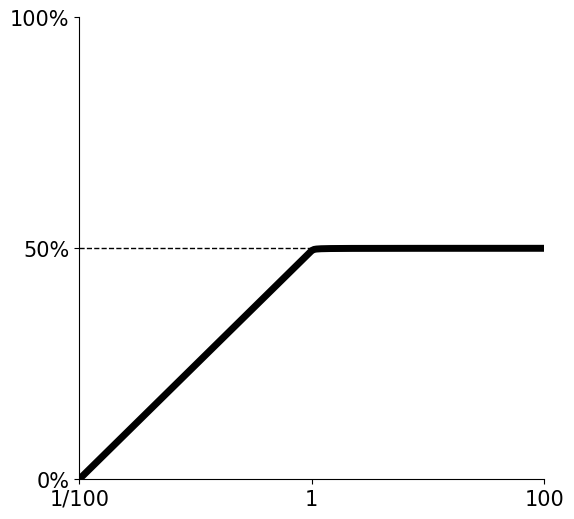

In [25]:
#Generate and save Figure 3C
fig, ax = plt.subplots(figsize=(6, 6))

#Parameter values
As=[1] #Different bias terms
Ds=[0]   #Different rivalry terms (use 0.99 instead of 1
#because otherwise need to account for unstable equilibria at p=1)
B=1
N=100

grid=100
space=[i+1 for i in range(grid)]
HBs=[1/space[-(i+1)] for i in range(grid)]+space[1:]
xs=[i for i in range(len(HBs))]
ps=np.zeros((len(As), len(HBs)))
mid=0.5*np.ones(len(HBs))

#Loop over different parameters
for j in range(len(As)):
    A=As[j]
    D=Ds[j]
    for i in range(len(HBs)):
        H=HBs[i]
        ps[j,i]=optimal_p(A, D, H, B, N)
    ax.plot(xs, ps[j,:], c='k', linewidth=5)


#Plot cosmetics
ax.plot(xs, mid, c='k', linestyle='--', linewidth=1)
plt.ylim([0, 1])
plt.yticks([0, 0.5, 1])
ax.set_yticklabels(['0%', '50%', '100%'])


plt.xlim([xs[0], xs[-1]])
plt.xticks([xs[0], int(len(xs)/2), xs[-1]])
ax.set_xticklabels(['1/100', '1', '100'])

plt.rcParams.update({'font.size': 12})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('Figure3C.pdf')

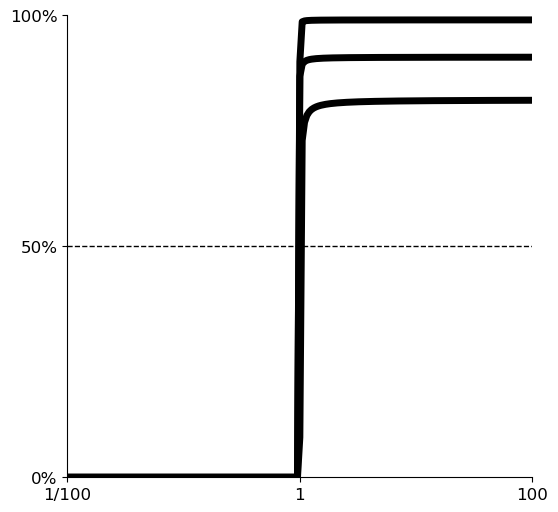

In [26]:
#Generate and save Figure 4
fig, ax = plt.subplots(figsize=(6, 6))

#Parameter values
As=[0, 0.05, 0] #Different bias terms
Ds=[0.99, 0.99, 0.5]   #Different rivalry terms (use 0.99 instead of 1
#because otherwise need to account for unstable equilibria at p=1)
B=1
N=100

grid=100
space=[i+1 for i in range(grid)]
HBs=[1/space[-(i+1)] for i in range(grid)]+space[1:]
xs=[i for i in range(len(HBs))]
ps=np.zeros((len(As), len(HBs)))
mid=0.5*np.ones(len(HBs))

#Loop over different parameters
for j in range(len(As)):
    A=As[j]
    D=Ds[j]
    for i in range(len(HBs)):
        H=HBs[i]
        ps[j,i]=optimal_p(A, D, H, B, N)
    ax.plot(xs, ps[j,:], c='k', linewidth=5)


#Plot cosmetics
ax.plot(xs, mid, c='k', linestyle='--', linewidth=1)
plt.ylim([0, 1])
plt.yticks([0, 0.5, 1])
ax.set_yticklabels(['0%', '50%', '100%'])


plt.xlim([xs[0], xs[-1]])
plt.xticks([xs[0], int(len(xs)/2), xs[-1]])
ax.set_xticklabels(['1/100', '1', '100'])

plt.rcParams.update({'font.size': 18})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('Figure4.pdf')

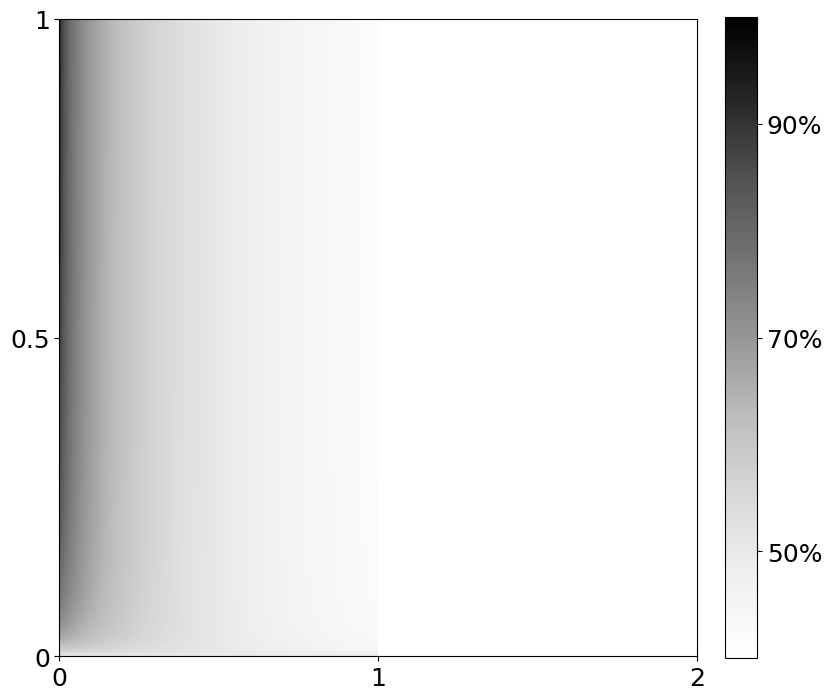

In [27]:
#Generate and save Figure2A 
fig, ax = plt.subplots(figsize=(9, 9))

#Set fixed parameters
B=0
H=1
N=100
H=1


#Set up for axes parameters
grid=1000
As=[2*i/grid for i in range(grid)] #Bias
Ds=[i/grid for i in range(grid)]   #Rivalry

#Loop thtough bias and rivalry values
ps=np.zeros((grid,grid))
for i in range(grid):
    for j in range (grid):
        A=As[j]
        D=Ds[i]
        ps[i,j]=optimal_p(A, D, H, B, N)
        
#Plot results and figure cosmetics       
c=plt.imshow(ps, cmap='Greys',origin='lower', vmin=0.4, vmax=1, interpolation ='nearest', aspect=2)
cbar=plt.colorbar(c, fraction=0.046, pad=0.04, ticks=[0.5, 0.7, 0.9])

plt.ylim([0, grid])
plt.yticks([0, grid/2, grid])
ax.set_yticklabels(['0', '0.5', '1'])

plt.xlim([0, 2*grid])
plt.xticks([0, grid, 2*grid])
ax.set_xticklabels(['0', '1', '2'])

cbar.ax.set_yticklabels(['50%', '70%', '90%'])
plt.rcParams.update({'font.size': 22})

plt.savefig('Figure3A.pdf')

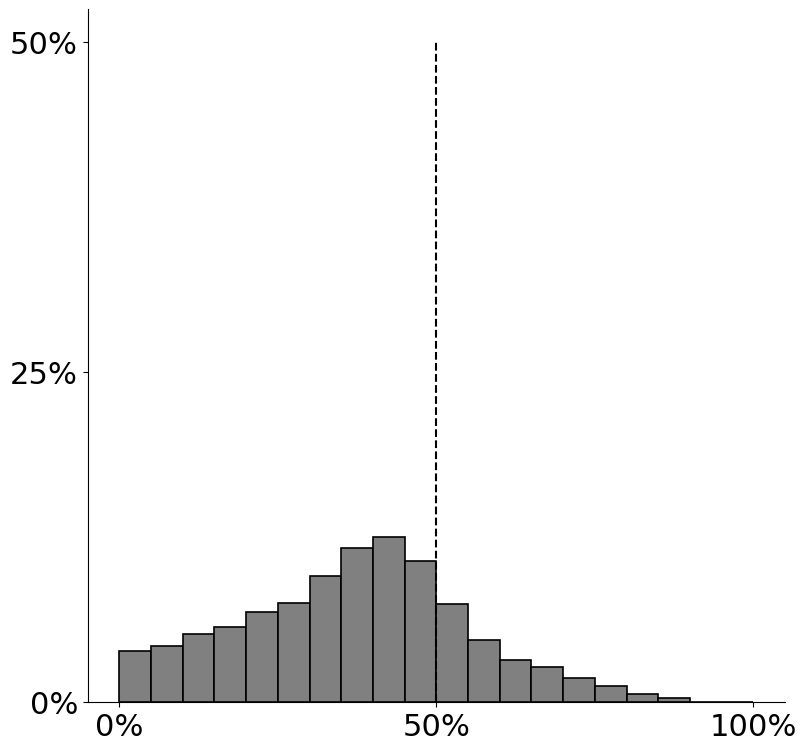

In [28]:
#Generate and save Figure5A 
fig, ax = plt.subplots(figsize=(9, 9))

#Set fixed parameters
N=100
samples=10000
ps=[]

for i in range(samples):
#Draw randomly distributed parameters
    B, H, D=np.random.uniform(size=3)
    A=np.random.uniform(low=0, high=2)
    p=optimal_p(A, D, H, B, N)
    if p>0: #Only plot outcomes for which division of labour is favoured
        ps.append(p)
    
#Plot results and figure cosmetics       
num_bins=20
bins=[i/num_bins for i in range(num_bins+1)]
weights = np.ones_like(ps) / len(ps)
plt.plot([0.5, 0.5], [0, 0.5], linestyle='--', color='k')
plt.hist(ps, bins=bins, weights=weights, color='grey', edgecolor='black', linewidth=1.2)

plt.xticks([0, 0.5, 1])
ax.set_xticklabels(['0%', '50%', '100%'])

plt.yticks([0, 0.25, 0.5])
ax.set_yticklabels(['0%', '25%', '50%'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('Figure5A.pdf')

In [8]:
#Create a function that given the size of the group, the rivalry, 
# the baseline fecundity, the scale of cooperative benefits, and the 
# efficiency benefits from helper use of the public good, returns the 
# optimal proportion of helpers and the optimal bias
def optimal_p_co(D, H, B, N, U):
    p=[]
    a=[]
    if (H/B)<(1/(1+U)):
        p.append(0)
        a.append(0)
    else:
        if U<(N-1):
            a.append(0)
            p.append((N-1)/N)
        if U>(1/(N-1)):
            a.append(1)
            p.append((H*(1+U)-B)/(2*H*(1+U)))
    #Return optimal proportion of helpers and optimal bias
    return p, a

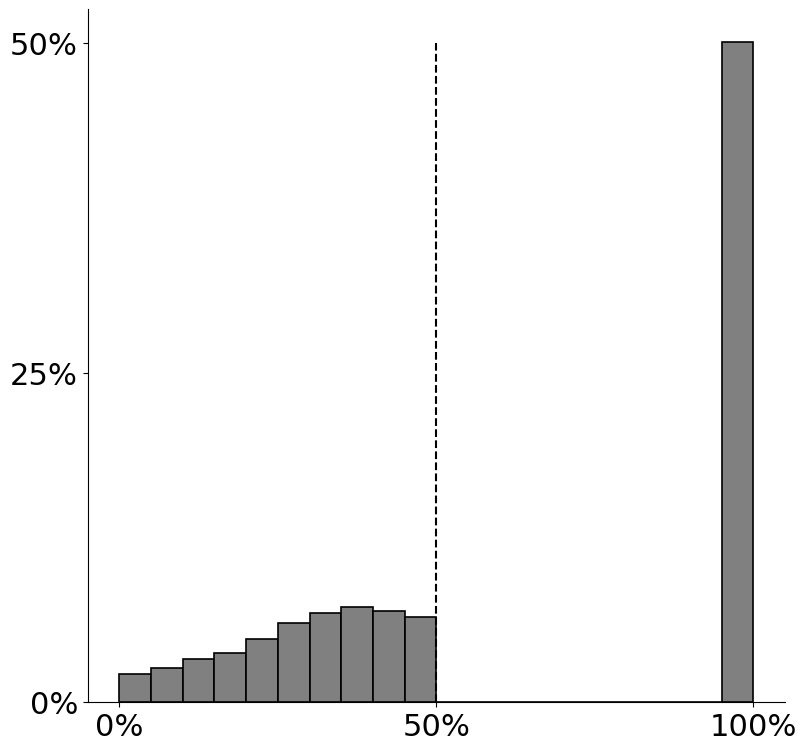

In [29]:
#Generate and save Figure5B 
fig, ax = plt.subplots(figsize=(9, 9))

#Set fixed parameters
N=100
samples=10000
ps=[]

for i in range(samples):
#Draw randomly distributed parameters
    B, H, D, U=np.random.uniform(size=4)
    p, _ =optimal_p_co(D, H, B, N, 2*U)
    for j in range(len(p)):
        pp=p[j]
        if pp>0: #Only plot outcomes for which division of labour is favoured
            ps.append(pp)
    
#Plot results and figure cosmetics       
num_bins=20
bins=[i/num_bins for i in range(num_bins+1)]
weights = np.ones_like(ps) / len(ps)
plt.plot([0.5, 0.5], [0, 0.5], linestyle='--', color='k')
plt.hist(ps, bins=bins, weights=weights, color='grey', edgecolor='black', linewidth=1.2)

plt.xticks([0, 0.5, 1])
ax.set_xticklabels(['0%', '50%', '100%'])

plt.yticks([0, 0.25, 0.5])
ax.set_yticklabels(['0%', '25%', '50%'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('Figure5B.pdf')

- 10% -- 20% -- 30% -- 40% -- 50% -- 60% -- 70% -- 80% -- 90% -- 100% -

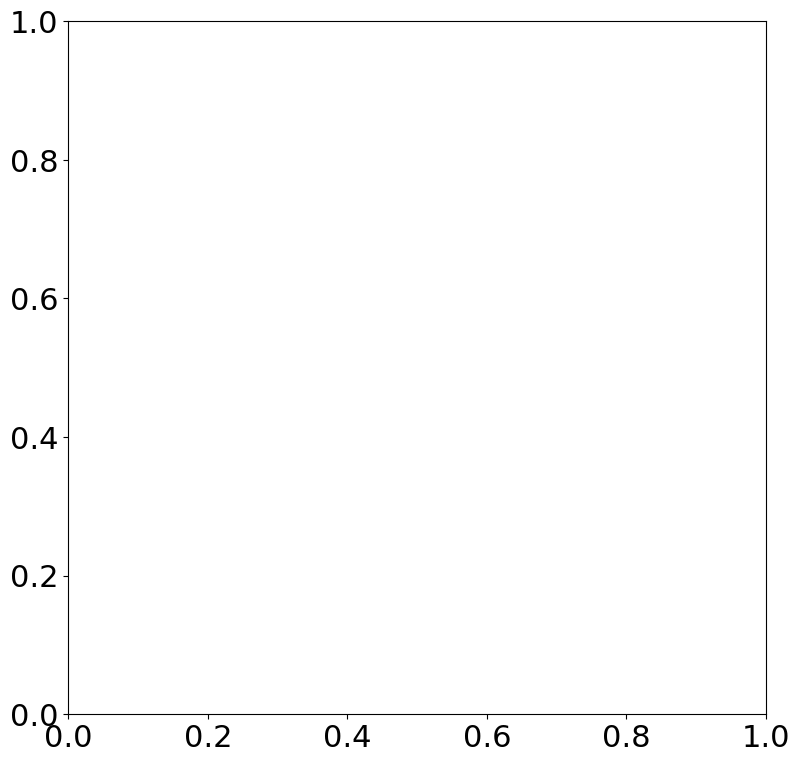

In [16]:
#Generate the data for Figures S1 and S2
fig, ax = plt.subplots(figsize=(9, 9))

#Set fixed parameters
B=0
H=2
N=100
H=1
s1=0.05 #scenarion 1: more linear fecundity
s2=0.5  #scenario 2: more diminishing fecundity

#Set up for axes parameters
grid=100
As=[2*i/grid for i in range(grid)] #Bias
Ds=[i/grid for i in range(grid)]   #Rivalry

#Simulation parameters
gens=2000
tol=0.01
sigma=0.01
take=100
pstart=(N-1)*np.random.uniform()/N

#Iterate through axes parameters and calculate optimal p for scenarios 1 and 2
ps1=np.zeros((grid,grid))
ps2=np.zeros((grid,grid))
for i in range(grid):
    if i%10==9:
        print("- ", int(100*float(i+1)/grid),"% -", sep="", end="")
    for j in range (grid):
        A=As[j]
        D=Ds[i]
        p1=pstart
        p2=pstart
        track1=np.zeros((gens, 2))
        track2=np.zeros((gens, 2))
        W1=(1-p1)*N*(1-np.exp(-s1*(B+H*p1*N/((1-D)+D*(A*p1*N+(1-p1)*N)))));
        W2=(1-p2)*N*(1-np.exp(-s2*(B+H*p2*N/((1-D)+D*(A*p2*N+(1-p2)*N)))));     
        for t in range(gens):
            #Update p1
            track1[t,:]=[p1, W1]
            new_p1=max(min(np.random.normal(p1, sigma),1),0)
            new_W1=(1-new_p1)*N*(1-np.exp(-s1*(B+H*new_p1*N/((1-D)+D*(A*new_p1*N+(1-new_p1)*N)))));
            if new_W1>W1 or np.random.uniform()<tol:
                p1=new_p1
                W1=new_W1
            #Update p2
            track2[t,:]=[p2, W2]
            new_p2=max(min(np.random.normal(p2, sigma),1),0)
            new_W2=(1-new_p2)*N*(1-np.exp(-s2*(B+H*new_p2*N/((1-D)+D*(A*new_p2*N+(1-new_p2)*N)))));
            if new_W2>W2 or np.random.uniform()<tol:
                p2=new_p2
                W2=new_W2
        #Calculate averages                
        ps1[i,j]=np.mean(track1[-take:,0])
        ps2[i,j]=np.mean(track2[-take:,0])

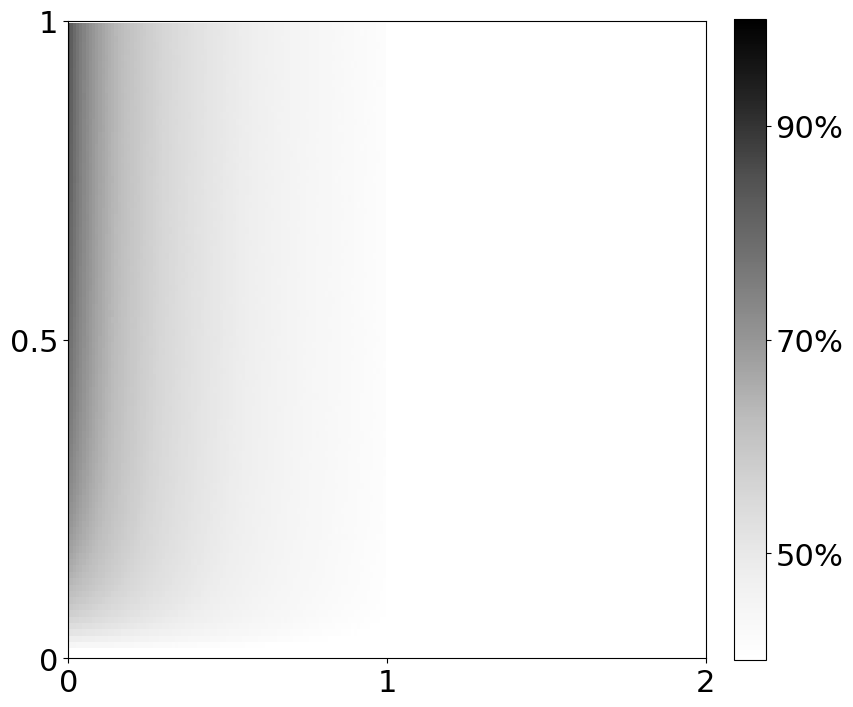

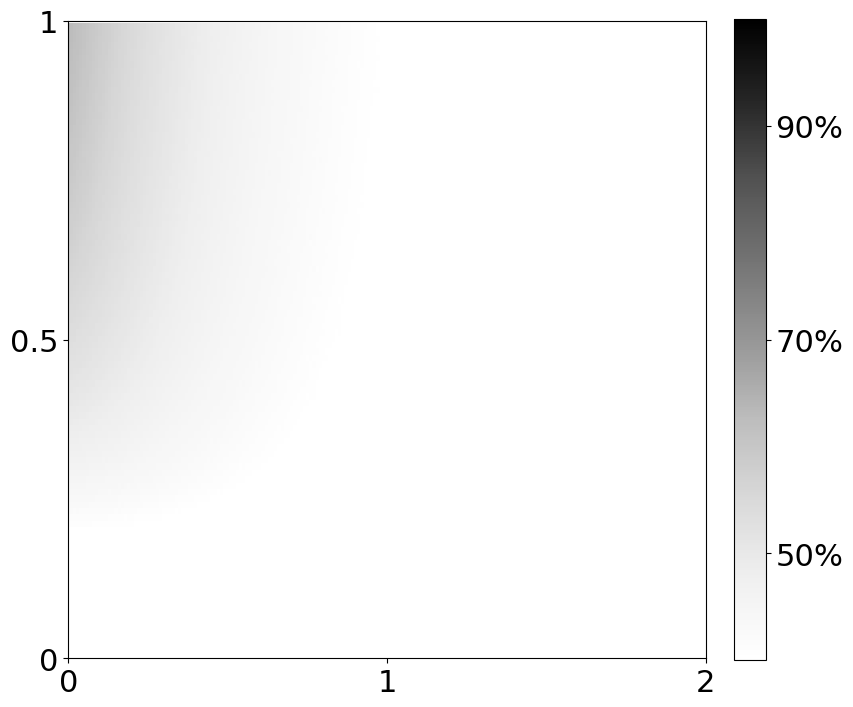

In [45]:
#Generate and save Figure S1 and Figure S2
fig, ax = plt.subplots(figsize=(9, 9))
#Plot results and figure cosmetics       
c=plt.imshow(ps1, cmap='Greys',origin='lower', vmin=0.4, vmax=1, aspect=2)
cbar=plt.colorbar(c, fraction=0.046, pad=0.04, ticks=[0.5, 0.7, 0.9])

plt.ylim([0, grid])
plt.yticks([0, grid/2, grid])
ax.set_yticklabels(['0', '0.5', '1'])

plt.xlim([0, 2*grid])
plt.xticks([0, grid, 2*grid])
ax.set_xticklabels(['0', '1', '2'])

cbar.ax.set_yticklabels(['50%', '70%', '90%'])
plt.rcParams.update({'font.size': 22})

plt.savefig('FigureS1.pdf')

fig, ax = plt.subplots(figsize=(9, 9))
#Plot results and figure cosmetics       
c=plt.imshow(ps2, cmap='Greys',origin='lower', vmin=0.4, vmax=1, aspect=2)
cbar=plt.colorbar(c, fraction=0.046, pad=0.04, ticks=[0.5, 0.7, 0.9])

plt.ylim([0, grid])
plt.yticks([0, grid/2, grid])
ax.set_yticklabels(['0', '0.5', '1'])

plt.xlim([0, 2*grid])
plt.xticks([0, grid, 2*grid])
ax.set_xticklabels(['0', '1', '2'])

cbar.ax.set_yticklabels(['50%', '70%', '90%'])
plt.rcParams.update({'font.size': 22})

plt.savefig('FigureS2.pdf')